<a href="https://colab.research.google.com/github/TheLadyJack/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module4-make-explanatory-visualizations/Copy_of_LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [0]:
# Your Work Here

In [3]:
#first pull up the target
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

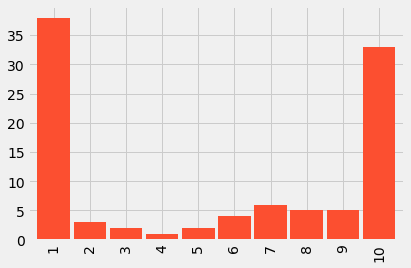

In [4]:
#then pull over the work I was following along with
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


plt.style.use('fivethirtyeight')

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

fake.plot.bar(color='C1', width=0.9);


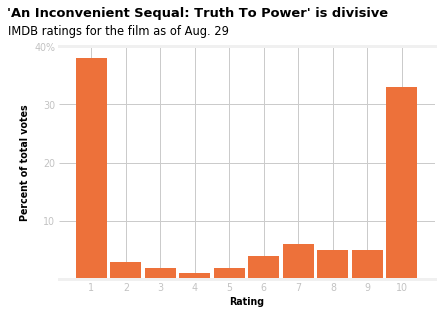

In [5]:
#graph style
plt.style.use('fivethirtyeight')

#make figure and axis
fig, ax = plt.subplots()

#bar details
ax.bar(x=[1,2,3,4,5,6,7,8,9,10], height=fake, color='#ED713A', width=0.9)

#figure color
fig.set_facecolor(color='None')

#axes color
ax.set_facecolor('None')

#set major tick 
ax.set_xticks([1,2,3,4,5,6,7,8,9,10])
ax.set_yticks([10,20,30,40])

#adjust tick aestetics
ax.set_yticklabels([10,20,30,'40%'], fontsize=9.5, color='#C3C3C3')
ax.set_xticklabels([1,2,3,4,5,6,7,8,9,10], fontsize=9.5, fontweight='light', color='#C3C3C3')


#remove the side spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# x label
ax.set_xlabel("Rating", fontsize=9.5, fontweight='semibold', stretch='semi-expanded')

# y label
ax.set_ylabel("Percent of total votes", fontsize=9.5, fontweight='semibold')

ax.set_title("'An Inconvenient Sequal: Truth To Power' is divisive", fontsize=13, x=.37, y=1.1, fontweight='demi')

ax.text(s="IMDB ratings for the film as of Aug. 29",fontsize=11.5, x=-1.4, y=42)

plt.show()

#close enough for now

In [6]:
#pull up a closer visual comparison
display(example)

In [0]:
#and now I work to poke and prod the visual semantics

In [8]:
#new data, new graph
#I like this one
#https://fivethirtyeight.com/features/how-qi-and-za-changed-scrabble/
#scrabble_d = pd.read_csv('https://github.com/fivethirtyeight/data/blob/master/scrabble-games/scrabble_games.csv')
#that didn't work
#!curl https://github.com/fivethirtyeight/data/blob/master/scrabble-games/scrabble_games.csv
scrabble_d = pd.read_csv('https://media.githubusercontent.com/media/fivethirtyeight/data/master/scrabble-games/scrabble_games.csv')
scrabble_d.head()
#haha! success!

,gameid,tourneyid,tie,winnerid,winnername,winnerscore,winneroldrating,winnernewrating,winnerpos,loserid,losername,loserscore,loseroldrating,losernewrating,loserpos,round,division,date,lexicon
0,1,1,False,268,Harriette Lakernick,0,1568,1684,1,429,Patricia Barrett,0,1915,1872,3,1,1,1998-12-06,False
1,2,1,False,268,Harriette Lakernick,0,1568,1684,1,435,Chris Cree,0,1840,1798,6,2,1,1998-12-06,False
2,3,1,False,268,Harriette Lakernick,0,1568,1684,1,441,Caesar Jaramillo,0,1622,1606,10,3,1,1998-12-06,False
3,4,1,False,268,Harriette Lakernick,0,1568,1684,1,456,Mike Chitwood,0,1612,1600,9,4,1,1998-12-06,False
4,5,1,False,268,Harriette Lakernick,0,1568,1684,1,1334,Nancy Scott,0,1537,1590,4,6,1,1998-12-06,False


In [9]:
#ok, this one I wholesale copied

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/04/roeder-scrabble-1.png'
example = Image(url=url, width=575)

display(example)

In [10]:
scrabble_d['loserscore'].describe()

losers = scrabble_d['loserscore']

losers.head()

winners = scrabble_d['winnerscore']

winners.head(20)

scrabble_d.head(50)

#I do not know why there is so many 0 point games, but i have my two lists
scrabble_d.tail(100)

,gameid,tourneyid,tie,winnerid,winnername,winnerscore,winneroldrating,winnernewrating,winnerpos,loserid,losername,loserscore,loseroldrating,losernewrating,loserpos,round,division,date,lexicon
1542542,1823684,9783,False,21846,Sara Rosenbaum,390,797,833,4,20183,Holly Lapiroff,355,791,771,9,6,3,2017-03-05,False
1542543,1823685,9783,False,21846,Sara Rosenbaum,546,797,833,4,24630,Norman Burstein,332,871,883,6,7,3,2017-03-05,False
1542544,1823686,9783,False,25135,Christina Lemoine,407,963,963,5,20024,Emily Lichtman,381,1000,974,7,1,3,2017-03-05,False
1542545,1823687,9783,False,25135,Christina Lemoine,500,963,963,5,22817,Jon Hunter,419,1059,1091,2,2,3,2017-03-05,False
1542546,1823688,9783,False,25135,Christina Lemoine,438,963,963,5,25845,Justin Radist,298,485,473,10,3,3,2017-03-05,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542637,1823779,3021,False,15830,Ella Bartholomew,0,0,923,21,2750,Poppy Thompson,0,0,771,30,6,3,1994-09-17,False
1542638,1823780,3021,False,1859,Claire Ullman,0,730,756,23,2750,Poppy Thompson,0,0,771,30,8,3,1994-09-17,False
1542639,1823781,3021,False,2750,Poppy Thompson,0,0,771,30,6345,Myra Odess,0,1150,1111,16,2,3,1994-09-17,False
1542640,1823782,3021,False,2750,Poppy Thompson,0,0,771,30,2441,Avis Turner,0,739,724,27,3,3,1994-09-17,False


In [0]:
#ope, gotta format them as lists
losers = scrabble_d['loserscore'].tolist()
winners = scrabble_d['winnerscore'].tolist()
#mmkay, cool

In [43]:
#losers.value_counts().sort_index().plot.bar();
losers.sort_values()

AttributeError: ignored

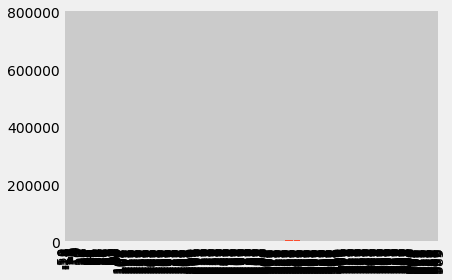

In [30]:
fake2 = pd.Series(losers)

fake2.value_counts().sort_index().plot.bar(color='C1', width=0.9);
#progress

In [28]:
#fake2.value_counts().sort_index().plot.bar(color='C1');

fake2.value_counts()
fake2 = fake2.replace(to_replace=0, value=np.NaN)
fake2.head()
fake2.isnull().sum()
fake2.value_counts()
#super messy and ugly, but progress

 340.0    7025
 341.0    6989
 336.0    6975
 337.0    6933
 331.0    6928
          ... 
 57.0        1
 56.0        1
 50.0        1
-25.0        1
 85.0        1
Length: 510, dtype: int64

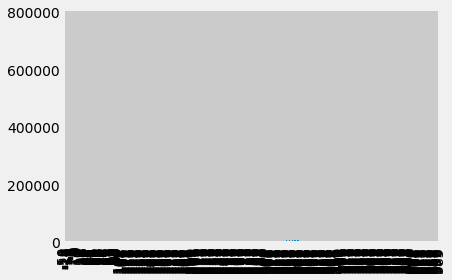

In [35]:
fake2.value_counts().sort_index().plot.bar();


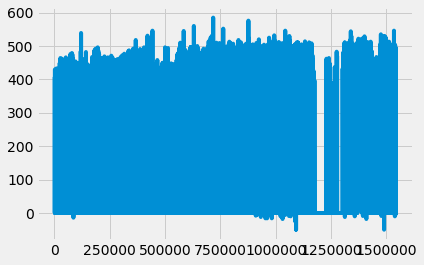

In [38]:
plt.plot(fake2)

TypeError: ignored

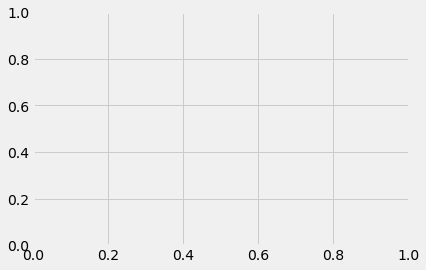

In [37]:
plt.style.use('fivethirtyeight')
#ok, so this is the graph style

#make figure and axis, as explained
fig, ax = plt.subplots()

#loser bar details, hopefully
ax.bar(x=fake2, height= color='#ED713A', width=0.9)



plt.show()
#I believe that these are all the allowed plt functions


# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here